# trips.csv - Data Cleaning

In [87]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [88]:
df_trips = pd.read_csv("/home/pau/Ironhack/week5/project5/Project-Week-5-Your-Own-Project/your-project/trip.csv")

In [89]:
df_trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [90]:
df_trips["starttime"] = df_trips["starttime"].astype("datetime64[ns]")
df_trips["stoptime"] = df_trips["stoptime"].astype("datetime64[ns]")
df_trips["Year"] = df_trips["starttime"].dt.year
df_trips = df_trips.drop(["from_station_name","to_station_name","gender","birthyear"], axis=1)
df_trips["tripduration"] = ((df_trips["tripduration"])/3600)
df_trips["Month"] = df_trips["starttime"].dt.month
df_trips["YearMonthDay"] = df_trips["starttime"].dt.date

In [91]:
def replace_numbers(month):
    if month < 10:
        return "0" + str(month)
    return str(month)

df_trips["Month"] = df_trips["Month"].apply(replace_numbers)

In [92]:
df_trips

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,to_station_id,usertype,Year,Month,YearMonthDay
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,0.273871,CBD-06,PS-04,Member,2014,10,2014-10-13
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,0.257326,CBD-06,PS-04,Member,2014,10,2014-10-13
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,0.245509,CBD-06,PS-04,Member,2014,10,2014-10-13
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,0.240538,CBD-06,PS-04,Member,2014,10,2014-10-13
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,0.256645,CBD-06,PS-04,Member,2014,10,2014-10-13
5,436,2014-10-13 10:34:00,2014-10-13 10:47:00,SEA00337,0.224668,CBD-06,PS-04,Member,2014,10,2014-10-13
6,437,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00202,0.165754,PS-04,PS-05,Member,2014,10,2014-10-13
7,438,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00311,0.164481,PS-04,PS-05,Member,2014,10,2014-10-13
8,439,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00486,0.162874,PS-04,PS-05,Member,2014,10,2014-10-13
9,440,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00434,0.163232,PS-04,PS-05,Member,2014,10,2014-10-13


In [110]:
df_test = df_trips.groupby(["YearMonthDay"]).count()[["usertype"]]
df_test

df_test2 = df_trips.groupby(["YearMonthDay"]).sum()[["tripduration"]]
df_test2

df_lol = df_test.merge(df_test2, left_on ="YearMonthDay", right_on="YearMonthDay")
df_lol.to_csv("/home/pau/Ironhack/week5/project5/Project-Week-5-Your-Own-Project/your-project/date_usertype_tripduration.csv")

## Trip Analysis

In [8]:
df_tripduration_per_day = df_trips.groupby(["YearMonthDay"]).sum()[["tripduration"]]
df_tripduration_per_day.head()

,tripduration
YearMonthDay,
2014-10-13,237.284833
2014-10-14,306.103728
2014-10-15,133.439650
2014-10-16,222.390892
2014-10-17,149.370242


In [11]:
df_tripduration_per_day["sma(120)"] = df_tripduration_per_day["tripduration"].rolling(120).mean()
df_tripduration_per_day["sma(30)"] = df_tripduration_per_day["tripduration"].rolling(30).mean()
df_tripduration_per_day.head()

,tripduration,sma(120),sma(30)
YearMonthDay,,,
2014-10-13,237.284833,NaN,NaN
2014-10-14,306.103728,NaN,NaN
2014-10-15,133.439650,NaN,NaN
2014-10-16,222.390892,NaN,NaN
2014-10-17,149.370242,NaN,NaN


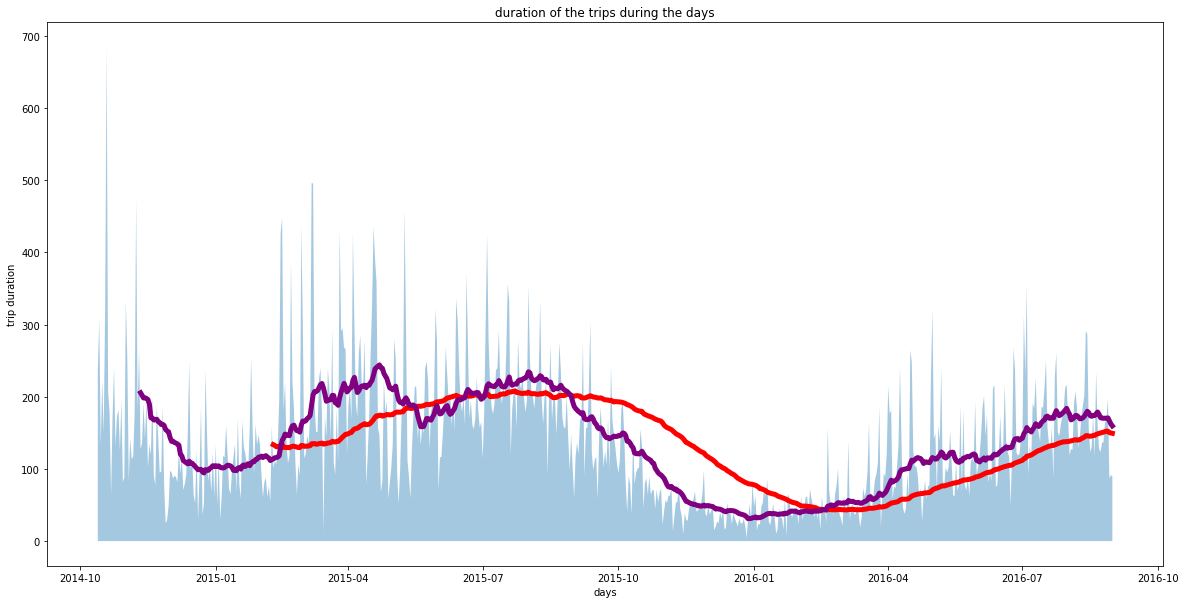

In [70]:
plt.figure(figsize=(20,10))
plt.fill_between(df_tripduration_per_day.index,df_tripduration_per_day["tripduration"], alpha=0.4)
plt.plot(df_tripduration_per_day.index,df_tripduration_per_day["sma(120)"], color="red", linewidth=5)
plt.plot(df_tripduration_per_day.index,df_tripduration_per_day["sma(30)"], color="purple", linewidth=5)
plt.title(f"duration of the trips during the days")
#plt.xticks(np.arange(0,50,step=25))
plt.xlabel("days")
plt.ylabel("trip duration")
plt.show()

## Members analysis

In [15]:
df_members = df_trips
df_members[df_members["usertype"] == "starttime"]
df_trips = df_trips.drop([50792])
df_trips["YearMonth"] = df_trips[["Year","Month"]].apply(lambda row: str(row["Year"])+"-"+str(row["Month"]), axis=1)
df_trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,to_station_id,usertype,Year,Month,YearMonthDay,YearMonth
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,0.273871,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,0.257326,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,0.245509,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,0.240538,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,0.256645,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10


In [63]:
df_member = df_trips[df_trips["usertype"] == "Member"].groupby("Year").count()["trip_id"]
df_short_term = df_trips[df_trips["usertype"] == "Short-Term Pass Holder"].groupby("Year").count()["trip_id"]

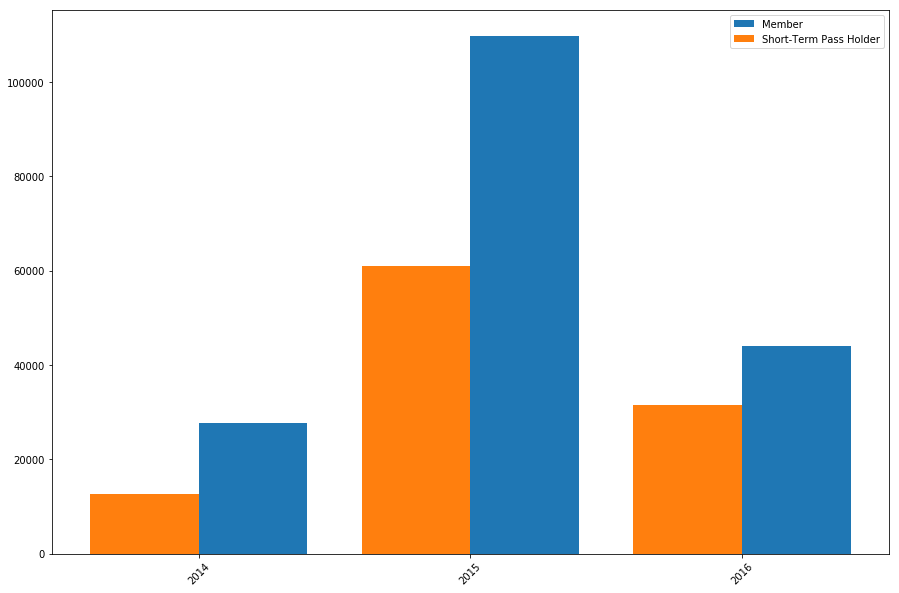

In [64]:
plt.figure(figsize=(15,10))
x_member = [x+0.2 for x in range(df_member.shape[0])]
x_short_term = [x - 0.2 for x in range(df_member.shape[0])]
plt.bar(x_member, df_member, width = 0.4, label="Member")
plt.bar(x_short_term, df_short_term, width = 0.4, label="Short-Term Pass Holder")
plt.xticks([x for x in range(df_member.shape[0])], df_member.index, rotation=45)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,10))